# transformer-自然语言处理

Transformer是近年来自然语言处理中非常重要的注意力机制模型,其基本原理及应用场景可以概括如下:

1. 原理

Transformer由编码器(Encoder)和解码器(Decoder)组成。主要的改进是完全利用注意力机制来捕捉词语之间的依赖关系,取代了RNN/CNN结构。

Transformer的注意力机制允许模型学习词语之间的远程依赖关系。同时,Transformer也使用残差连接和层规范化来提升训练速度。

2. 应用场景

Transformer最初是作为神经机器翻译模型而提出,后来被证明在多个自然语言处理任务上都有出色表现。

主要的应用场景包括:

- 机器翻译:Transformer可以更好地建模长句子的语法结构。

- 文本摘要:通过Encoder-Decoder结构进行抽象式文本摘要。

- 语音识别:将语音信号转换为文本标注信息。

- 自然语言推断:通过语义匹配判定文本之间的逻辑关系。

- 问答系统:可以注意到问题和文档之间的语义匹配关系。

综上,Transformer通过其高效的注意力机制,在多种自然语言处理任务上都表现优异,已成为该领域的主流模型。

https://blog.csdn.net/qq_52785473/article/details/124537101

https://blog.csdn.net/Datawhale/article/details/120320116

In [10]:
from IPython.display import Image
Image(url= "28.png",width=400)

In [9]:
Image(url= "29.png",width=500)

# 词嵌入

## 独热编码(one-hot encoding)

在机器学习任务中,类别特征通常需要转换为独热编码(one-hot encoding)进行模型输入,主要有以下两个原因:

1. 避免假定类别顺序。直接将类别特征用数字编码(比如0,1,2)会假定类别之间有大小顺序关系,而实际上类别仅仅是不同的类型,之间并无大小顺序可言。

2. 线性可分。多分类任务需要模型输出维度等于类别数,而独热编码可以将类别扩展为一个个0/1的特征维度,使不同类别成为线性可分的。

具体来说,对于一个有N个类别的特征,使用独热编码将其转换为一个N维0/1向量,其中类别的索引位置为1,其他位置为0。

比如对颜色特征["红","绿","蓝"]使用独热编码,可以将其转换为:

红 -> [1, 0, 0] 

绿 -> [0, 1, 0]

蓝 -> [0, 0, 1]

这样模型就能够区分不同颜色,而不会对颜色顺序进行假设。因此,独热编码常用于处理机器学习模型中的类别特征。

In [5]:
import pandas as pd

df = pd.DataFrame([
    ['green', 'Chevrolet', 2017],
    ['blue', 'BMW', 2015],
    ['yellow', 'Lexus', 2018],
])
df.columns = ['color', 'make', 'year']
df

,color,make,year
0,green,Chevrolet,2017
1,blue,BMW,2015
2,yellow,Lexus,2018


In [3]:
df_processed = pd.get_dummies(df, columns=['color', 'make'] ,dtype=int)
df_processed

,year,color_blue,color_green,color_yellow,make_BMW,make_Chevrolet,make_Lexus
0,2017,0,1,0,0,1,0
1,2015,1,0,0,1,0,0
2,2018,0,0,1,0,0,1


## 自然语言处理的主要任务

自然语言处理的主要任务包括:

1. 文本分类:将文本划分到预定义的类别中,如情感分析、新闻分类等。常用方法有SVM、CNN、RNN等。

2. 名实体识别(NER):识别文本中的名实体,如人名、地名、组织名等。通常把它作为序列标注问题来解决。

3. 语言模型:给出前面的词序列,预测下一个词的概率。语言模型可应用于机器翻译、语音识别等任务。

4. 文本生成:根据输入信息自动生成文本,如机器翻译、对话系统、文本摘要等。

5. 信息抽取:从非结构化文本中提取结构化信息,如关系抽取、事件抽取等。

6. 文本相似性:计算两个文本语义的相似程度,应用在相似文档检索等任务上。

7. 问答系统:接收用户问题并从知识库中搜索答案,如聊天机器人。

8. 篇章分析:分析文本的语法结构、核心词等要素,以获取文本的深层含义。

9. 情感分析:判断一段文本所表达的情绪态度,即正面还是否定面。

以上是自然语言处理的典型任务,还有语音识别、机器翻译等也属于该领域。实际应用中往往会集成多个技术来解决问题。

## 词嵌入(word embedding)

词嵌入(word embedding)是自然语言处理中的一个重要技术,它的思想是将词映射到一个连续的低维向量空间中,使得语义相似的词在这个空间中距离较近。

https://pytorch.org/tutorials/beginner/nlp/word_embeddings_tutorial.html

https://blog.csdn.net/raelum/article/details/125462028


## pytorch 中的词嵌入nn.Embedding

nn.Embedding和nn.Linear都是PyTorch中常用的层,两者的主要区别是:

1. nn.Embedding用于处理离散特征,nn.Linear用于处理连续特征。

2. nn.Embedding将整数索引映射到固定维度的稠密向量,nn.Linear将输入数据映射到输出维度。

3. nn.Embedding输出维度由嵌入矩阵定义,nn.Linear输出维度由Linear层参数定义。

4. nn.Embedding输入一般是词索引,nn.Linear输入可以是任意形状张量。

上面例子展示了nn.Embedding和nn.Linear的不同之处:前者处理离散特征获得到词向量,后者用于连续特征的线性映射。两者在自然语言处理任务中经常联合使用。



In [6]:

Image(url= "25.png",width=400)

In [44]:
Image(url= "24.webp",width=500)

In [13]:
Image(url= "30.jpg",width=800)

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import math
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import copy

In [9]:
# nn.Embedding
embed = nn.Embedding(10, 64) # 10个词,embedding维度64 
input = torch.LongTensor([1,5,8]) # 输入词索引
embed_vector = embed(input) # 将词索引映射为词向量

# nn.Linear 
fc = nn.Linear(32, 10) # 输入维度32,输出维度10
input = torch.randn(8, 32) # 8个32维输入 
output = fc(input) # 全连接层映射到10维输出

* 简单实现（在torch中并没有用独热，而是通过位置与nn.Embedding特殊的机制实现了类似独热的效果）

In [32]:
word_to_ix = {"hello": 0, "world": 1}
embeds = nn.Embedding(2, 5)  # 2 words in vocab, 5 dimensional embeddings
lookup_tensor = torch.tensor([word_to_ix["hello"]], dtype=torch.long)
hello_embed = embeds(lookup_tensor)
print(hello_embed)

tensor([[ 1.5719, -1.1032,  0.6363, -1.1446, -0.7449]],
       grad_fn=<EmbeddingBackward0>)


In [33]:
embeds.weight

Parameter containing:
tensor([[ 1.5719, -1.1032,  0.6363, -1.1446, -0.7449],
        [-1.3902,  0.4242, -0.8732,  1.0635, -0.1250]], requires_grad=True)

* transformer中的实现

https://blog.csdn.net/qq_52785473/article/details/124537101

In [2]:
class Embeddings(nn.Module):
    def __init__(self, d_model, vocab):
    # d_model:词嵌入维度
    # vocab:字典大小
        super(Embeddings, self).__init__()
        self.lut = nn.Embedding(vocab, d_model)
        self.d_model = d_model
    def forward(self, x):
        return self.lut(x) * math.sqrt(self.d_model)


In [3]:
d_model = 512  # embedding_size
vocab = 1000  # 词典大小
x=torch.tensor([[100, 2, 421, 508], [491, 998, 1, 221]], dtype=torch.long)
emb = Embeddings(d_model, vocab)
embr = emb(x)
print(embr.shape)


torch.Size([2, 4, 512])


In [17]:
embr

tensor([[[ 15.7212,   4.3630, -33.6761,  ...,  -0.7592, -13.7363,  11.5903],
         [ 12.0749,  10.4128, -10.1933,  ...,  34.7949,  -3.0311,  17.0476],
         [  0.6647,  20.0967,   9.4181,  ...,  48.3645,  -0.1343,  26.2912],
         [-35.6708,  15.1472, -10.3006,  ...,   3.2073, -56.4983,  -1.2893]],

        [[-31.4328, -15.9547,  15.4086,  ...,  30.6488, -15.2330,  -2.4861],
         [ 64.8109,   2.7769, -44.1796,  ...,   9.1904,   8.7161,  -3.3016],
         [-28.0984,  26.3967, -23.8661,  ...,   1.1219, -28.1064,  46.9230],
         [  0.7738,  -6.5431,  -9.1307,  ...,  21.3106, -16.5163,  17.5139]]],
       grad_fn=<MulBackward0>)

In [1]:
#已知如下语料,给出其词嵌入
corpus = ["he is an old worker", "english is a useful tool", "the cinema is far away"]

## 语言模型

词嵌入的基本原理是使用神经网络模型学习词与词之间的关系,常见的模型有连续词袋模型(CBOW)和跳过语рам模型(skip-gram)。这些模型的目标是最大化一个词的上下文词出现的概率。

## N-gram语言模型

N-gram语言模型是自然语言处理中一种重要的语言模型,它通过计算语言序列中连续N个词的联合概率来建模语言。

具体来说,N-gram模型假设词的出现只与前N-1个词相关。例如,在双gram(N=2)模型中,词$w_i$的条件概率可以表示为:

$P(w_i|w_{i-1})$

在trigram(N=3)模型中,词$w_i$的条件概率为:

$P(w_i|w_{i-1},w_{i-2})$ 

一般地,N-gram模型中词$w_i$的条件概率为:

$P(w_i|w_{i-1},...,w_{i-N+1})$

根据链式法则,语言序列中所有词连乘的联合概率可以表示为:

$P(w_1, ..., w_M) = \prod_{i=1}^{M} P(w_i|w_{i-1},...,w_{i-N+1})$

其中M是词序列长度。

N-gram模型通过统计语料中N个词共现的频率来估计条件概率$P(w_i|w_{i-1},...,w_{i-N+1})$。通常采用最大似然估计或平滑技巧来解决数据稀疏性问题。

N-gram建模简单易实现,可有效模拟语言局部词序列模式。但无法捕捉长距离依赖关系。

In [7]:
CONTEXT_SIZE = 2
EMBEDDING_DIM = 10
torch.manual_seed(1)
# We will use Shakespeare Sonnet 2
test_sentence = """When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv'd thy beauty's use,
If thou couldst answer 'This fair child of mine
Shall sum my count, and make my old excuse,'
Proving his beauty by succession thine!
This were to be new made when thou art old,
And see thy blood warm when thou feel'st it cold.""".split()
# we should tokenize the input, but we will ignore that for now
# build a list of tuples.
# Each tuple is ([ word_i-CONTEXT_SIZE, ..., word_i-1 ], target word)
ngrams = [
    (
        [test_sentence[i - j - 1] for j in range(CONTEXT_SIZE)],
        test_sentence[i]
    )
    for i in range(CONTEXT_SIZE, len(test_sentence))
]
# Print the first 3, just so you can see what they look like.
print(ngrams[:3])

vocab = set(test_sentence)
word_to_ix = {word: i for i, word in enumerate(vocab)}


class NGramLanguageModeler(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out, dim=1)
        return log_probs

loss_function = nn.NLLLoss()


[(['forty', 'When'], 'winters'), (['winters', 'forty'], 'shall'), (['shall', 'winters'], 'besiege')]


## CBOW(Continuous Bag of Words)和skip-gram

CBOW(Continuous Bag of Words)和skip-gram都是词向量训练算法,两者的主要区别如下:

**CBOW**

- 输入是上下文词,预测目标词
- 输入层到隐层投影是一个连续的词袋(不区分词顺序)
- 目标是根据上下文词预测当前词

**skip-gram**

- 输入是中心词,预测上下文词 
- 从输入词向量映射到输出词向量 
- 目标是通过当前词预测上下文

具体来说:

**CBOW**  

给定一个词序列(w1, w2, w3, ..., wT),CBOW 的目标是最大化给定上下文词预测当前词wt的概率:

P(wt | wt-k, ..., wt+k)

其中wt-k,...,wt+k为wt的上下文词窗口。

**skip-gram**

给定一个词序列(w1, w2, w3, ..., wT),skip-gram 的目标是最大化通过当前词wt预测上下文词wj的概率:

P(wj | wt) 

其中wj为wt的上下文词。

CBOW 通过上下文词预测当前词,更关注上下文的语义信息。skip-gram 通过当前词预测上下文,更关注中心词的语义信息。两者分别从不同方面学到词向量的语义信息。

In [19]:
Image(url= "27.png",width=800)

In [29]:
CONTEXT_SIZE = 2  # 2 words to the left, 2 to the right
raw_text = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells.""".split()

# By deriving a set from `raw_text`, we deduplicate the array
vocab = set(raw_text)
vocab_size = len(vocab)

word_to_ix = {word: i for i, word in enumerate(vocab)}
data = []
for i in range(CONTEXT_SIZE, len(raw_text) - CONTEXT_SIZE):
    context = (
        [raw_text[i - j - 1] for j in range(CONTEXT_SIZE)]
        + [raw_text[i + j + 1] for j in range(CONTEXT_SIZE)]
    )
    target = raw_text[i]
    data.append((context, target))
print(data[:5])


[(['are', 'We', 'to', 'study'], 'about'), (['about', 'are', 'study', 'the'], 'to'), (['to', 'about', 'the', 'idea'], 'study'), (['study', 'to', 'idea', 'of'], 'the'), (['the', 'study', 'of', 'a'], 'idea')]


## 位置编码

以前的方法-表格型

* 方法一：使用[0,1]范围分配

这个方法的分配方式是，将0-1这个范围的，将第一个token分配0，最后一个token分配去1，其余的token按照文章的长度平均分配。具体形式如下：

我喜欢吃洋葱 【0 0.16 0.32.....1】

我真的不喜欢吃洋葱【0 0.125 0.25.....1】

问题：我们可以看到，如果句子长度不同，那么位置编码是不一样，所以无法表示句子之间有什么相似性。

* 方法二：1-n正整数范围分配

这个方法比较直观，就是按照输入的顺序，一次分配给token所在的索引位置。具体形式如下：

我喜欢吃洋葱 【1，2，3，4，5，6】

我真的不喜欢吃洋葱【1，2，3，4，5，6，7】

问题：往往句子越长，后面的值越大，数字越大说明这个位置占的权重也越大，这样的方式无法凸显每个位置的真实的权重。


https://www.cnblogs.com/ghj1976/p/li-jietransformer-de-wei-zhi-bian-ma.html

https://blog.csdn.net/Kaiyuan_sjtu/article/details/119621613

In [24]:
Image(url= "31.jpg",width=800)

In [23]:
Image(url= "32.jpg",width=800)

### Transformer算法中的位置编码与其他方法的比较（chatgpt）

Transformer算法中的位置编码(Positional Encoding)与RNN、LSTM中处理位置信息的方法有以下不同:

1. Transformer的位置编码利用正弦、余弦函数将位置信息编码到词向量中,使模型对相对距离高度敏感。

2. RNN、LSTM通过序列传递隐状态的方式来表示位置信息,位置信息被编码在隐状态中。

3. 位置编码可以完全并行计算,计算效率更高。RNN、LSTM的顺序计算方式计算效率较低。

4. 位置编码为模型带来一定的位置不变性,使模型对位置信息稍有变化更鲁棒。RNN和LSTM对位置变化更敏感。

5. 通过周期性函数,位置编码使模型更好地学习到位置信息,相比RNN、LSTM直接使用位置索引更有效。

6. 位置编码避免了位置信息过于绝对化,对位置稍有变化更加鲁棒。RNN和LSTM位置信息较为绝对。

7. RNN、LSTM隐状态囊括了所有历史信息,计算资源利用率不高且训练难度较大。位置编码只编码位置,节省资源。

综上,位置编码与RNN、LSTM顺序信息表示方法有不同优点。前者计算效率更高,对位置稍有偏移更鲁棒,是Transformer理解语序的关键。

Transformer算法中的位置编码(Positional Encoding)与RNN、LSTM处理顺序信息的方法具有以下优缺点:

**位置编码的优点:**

- 计算效率高,可以完全并行
- 为模型带来一定位置不变性,对小的位置变化更鲁棒
- 使用周期函数,使模型更好地学习位置信息
- 避免位置信息过于绝对化
- 较RNN和LSTM更简单,只编码位置信息

**位置编码的缺点:**

- 需要设置最大序列长度,长度过长会导致计算复杂度提升
- 仅编码相对位置,无法表示绝对位置
- 对语序变化不如RNN等顺序敏感
- 需搭配注意力机制,单独使用效果较弱

**RNN和LSTM的优点:** 

- 可以表示绝对位置信息
- 对语序变化更敏感
- LSTM可以捕捉长程依赖关系

**RNN和LSTM的缺点:**

- 计算复杂度高,无法并行计算
- 对位置信息过于敏感
- 隐状态编码了所有历史,计算资源利用率低

总之,位置编码更高效并具有一定位置鲁棒性,但RNN和LSTM可以建模绝对位置并对语序更敏感。两者互补的特点可根据任务需求进行选择。

[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00 ...  1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 8.41470985e-01  5.40302306e-01  7.61720408e-01 ...  9.99999991e-01
   1.15478198e-04  9.99999993e-01]
 [ 9.09297427e-01 -4.16146837e-01  9.87046251e-01 ...  9.99999964e-01
   2.30956395e-04  9.99999973e-01]
 ...
 [ 1.23573123e-01 -9.92335469e-01  1.39920673e-01 ...  9.99980359e-01
   5.42744868e-03  9.99985271e-01]
 [-7.68254661e-01 -6.40144339e-01 -6.63571724e-01 ...  9.99979514e-01
   5.54292514e-03  9.99984638e-01]
 [-9.53752653e-01  3.00592544e-01 -9.99784705e-01 ...  9.99978652e-01
   5.65840153e-03  9.99983991e-01]]


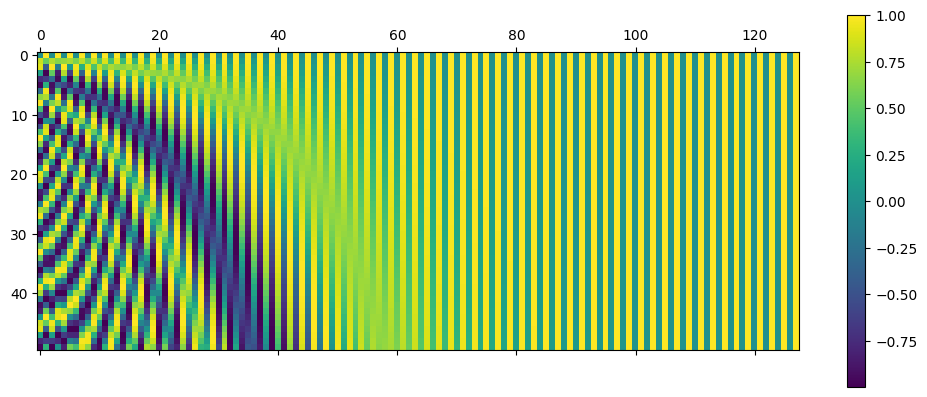

In [27]:
import numpy as np
import matplotlib.pyplot as plot

def getPositionEncoding(seq_len,dim,n=10000):
  PE = np.zeros(shape=(seq_len,dim))
  for pos in range(seq_len):
    for i in range(int(dim/2)):
      denominator = np.power(n, 2*i/dim)
      PE[pos,2*i] = np.sin(pos/denominator)
      PE[pos,2*i+1] = np.cos(pos/denominator)

  return PE

PE = getPositionEncoding(seq_len=50, dim=128, n=10000)
print(PE)

caxes = plot.matshow(PE,interpolation ='nearest')
plot.colorbar(caxes) 
plot.show()

* transformer中的实现

https://blog.csdn.net/qq_52785473/article/details/124537101


1. unsqueeze

2. Dropout

In [35]:
# unsqueeze函数使用案例
x = torch.Tensor([1,2,3,4]) #torch.Tensor是默认的tensor类型
print(x.size())  # torch.Size([4])
print(x.dim())  # dimension的个数为1
print(x.numpy())  # [1. 2. 3. 4.]

print(torch.unsqueeze(x, 0))  # tensor([[1., 2., 3., 4.]])
######  等价于torch.unsqueeze(x,-2) ######
print(torch.unsqueeze(x, 0).size())  # torch.Size([1, 4])
print(torch.unsqueeze(x, 0).dim())  # dimension的个数为2
print(torch.unsqueeze(x, 0).numpy())  # [[1. 2. 3. 4.]]

print(torch.unsqueeze(x, 1))
###### 等价于torch.unsqueeze(x,-1)  ######
# tensor([[1.],
#         [2.],
#         [3.],
#         [4.]])
print(torch.unsqueeze(x, 1).size())  # torch.Size([4, 1])
print(torch.unsqueeze(x, 1).dim())  # dimension的个数为2

torch.Size([4])
1
[1. 2. 3. 4.]
tensor([[1., 2., 3., 4.]])
torch.Size([1, 4])
2
[[1. 2. 3. 4.]]
tensor([[1.],
        [2.],
        [3.],
        [4.]])
torch.Size([4, 1])
2


: 

In [25]:
# Dropout函数
m = nn.Dropout(p=0.2)
 input = torch.randn(20, 16)
 output = m(input)

 print(input[0])
 print(output[0])

tensor([ 1.5934,  1.1530,  1.5504,  0.3990,  0.2831, -1.0402,  1.6277, -0.1046,
         0.8334,  0.4784, -2.1325, -1.5482,  0.9300, -0.4636,  0.6696, -0.1754])
tensor([ 1.9917,  1.4412,  1.9380,  0.4987,  0.3539, -1.3002,  2.0346, -0.1308,
         0.0000,  0.5980, -2.6656, -1.9353,  1.1625, -0.5795,  0.8370, -0.0000])


In [4]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout, max_len=5000):
    # d_model:词嵌入维度
    # dropout:置零比率
    # max_len:每个句子最大的长度
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0,  max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(1000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer("pe", pe)

    def forward(self, x):
        x = x + Variable(self.pe[:, :x.size(1)], requires_grad=False)
        return self.dropout(x)


In [17]:
torch.arange(0,  6).unsqueeze(1)

tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5]])

In [26]:
dropout = 0.1
max_len = 60
pe = PositionalEncoding(d_model, dropout, max_len)
pe_result = pe(embr)
print(pe_result.shape)

torch.Size([2, 4, 512])


In [29]:
#pe_result

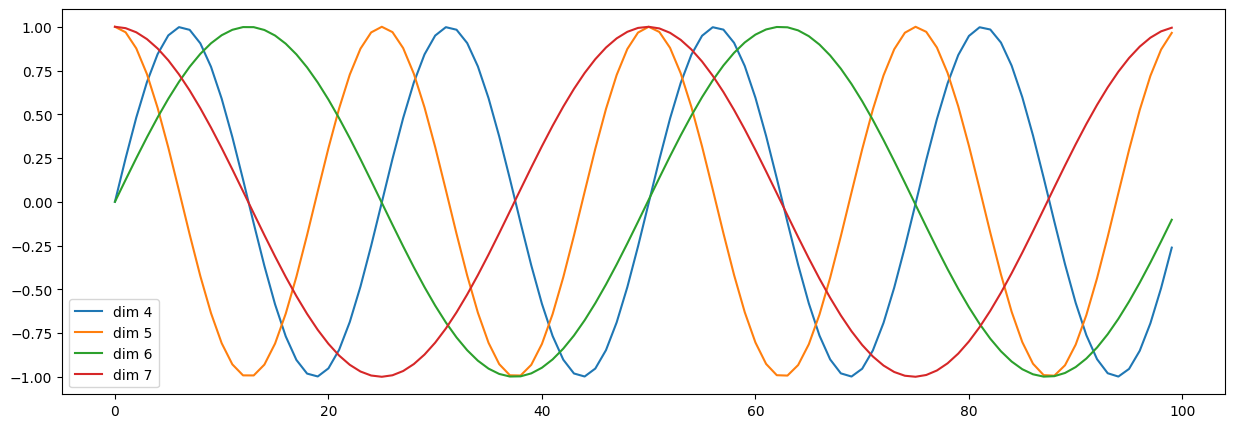

In [27]:
plt.figure(figsize=(15, 5))
pe = PositionalEncoding(20, 0)
# 传入全0参数，相当于展示位置编码
y = pe(Variable(torch.zeros(1, 100, 20)))
plt.plot(np.arange(100), y[0, :, 4:8].data.numpy())
plt.legend(["dim %d" %p for p in [4, 5, 6, 7]])